# Machine Learning for Medicine
# Clustering High Dimensional Medical DATA
> * **Merrouche Aymen**

# Introduction

In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import pandas as pd

# Data

## Import medical data :

### Breast cancer data set : 
> Describes wheather a breast mas is malignant or not based cell nuclei characteristics.

In [2]:
# import the data
data_path = './data/'
breast_cancer = pd.read_table(data_path+"BreastDiagnostic.txt",sep=",",header=None)

In [3]:
breast_cancer_X = breast_cancer.drop([0, 1], axis=1)
breast_cancer_X

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
breast_cancer_y = breast_cancer[1]
breast_cancer_y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: 1, Length: 569, dtype: object

### Mice data set :
> Describes different classes of mice based on different variables (expression levels of 77 proteins/protein modifications, genotype, behavior and treatment)

In [5]:
# import the data
data_path = './data/'
mice_dataset = pd.read_excel(data_path+"Data_Cortex_Nuclear.xls")
# fill nans
mice_dataset = mice_dataset.interpolate(limit_direction = 'both', limit = None)
# delete id (non informative) and class (for clustering)
mice_dataset_X = mice_dataset.drop(["MouseID", "class"], axis=1)

In [6]:
# get non numerical features
num_cols = mice_dataset_X._get_numeric_data().columns
non_num_cols = set(mice_dataset_X.columns) - set(num_cols)

In [7]:
from sklearn import preprocessing
# encode non numerical features (all methods compute distances)
for non_numerical_feature in non_num_cols:
    labelEncoder = preprocessing.LabelEncoder()
    labelEncoder.fit(mice_dataset_X[non_numerical_feature])
    mice_dataset_X[non_numerical_feature] = labelEncoder.transform(mice_dataset_X[non_numerical_feature])
mice_dataset_X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,1,1,1
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,1,1,1
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,1,1,1
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,1,1,1


In [8]:
mice_dataset_y = mice_dataset["class"]
mice_dataset_y

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

In [9]:
medical_data = {"breast" : (breast_cancer_X, breast_cancer_y), "mice" : (mice_dataset_X, mice_dataset_y)}

## Generate toy datasets :

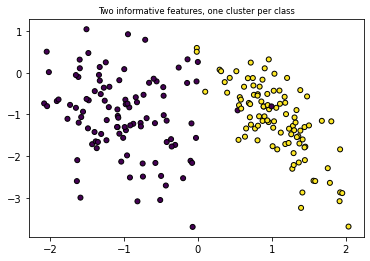

In [10]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state = 5)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

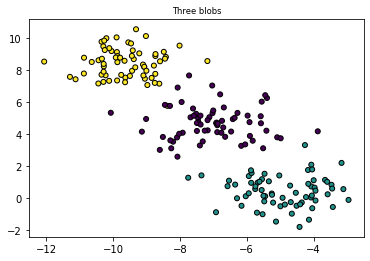

In [11]:
# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3, random_state = 12)

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

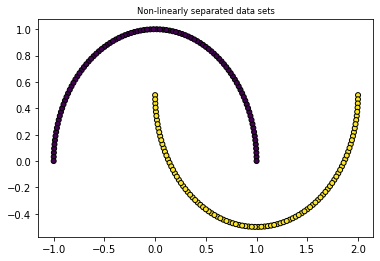

In [12]:
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)

plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

In [13]:
data = {"classes" : (X1, Y1), "blobs" : (X2, Y2), "moons" : (X3, Y3)}

# 1 - K-means
> K-means is a cost minimisation clustering method. It uses a center based objective function which is based on cluster centers (centroid or representer). The k-means objective function is the sum of squared differences between each point and the centroid of its corresponding cluster.

In [14]:
metrics_list = {"Homogeneity" : metrics.homogeneity_score, "Completeness": metrics.completeness_score,\
           "V-measure" : metrics.v_measure_score, "Adjusted Rand-Index" : metrics.adjusted_rand_score,\
           "Silhouette Coefficient" : metrics.silhouette_score}

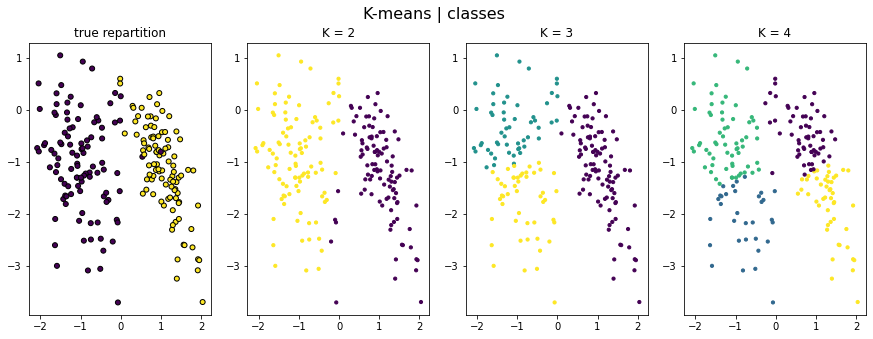

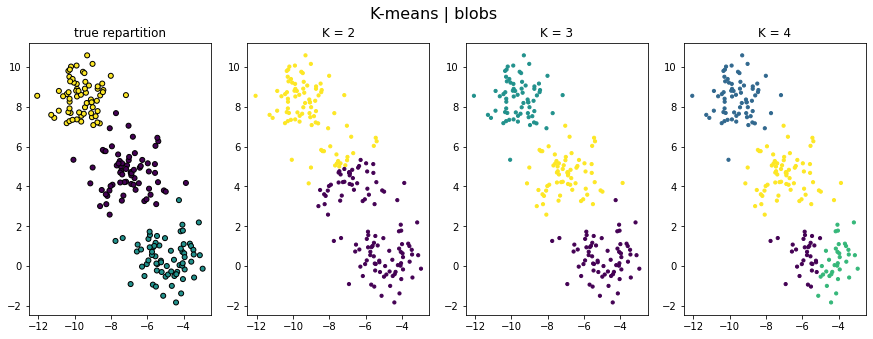

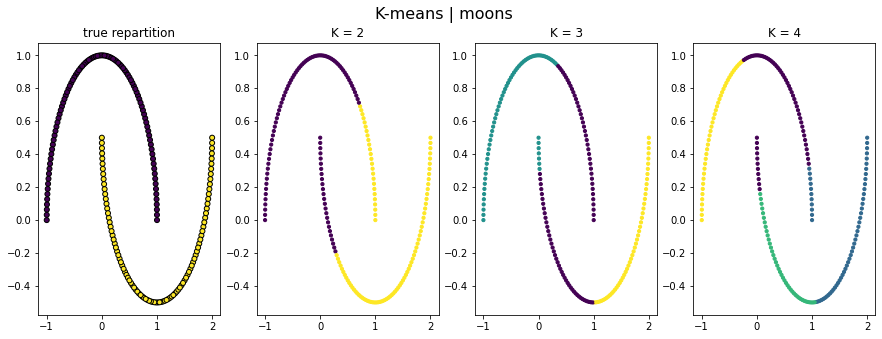

In [15]:
k_means_scores = {}
km = KMeans(init='k-means++', max_iter=100, n_init=1)
for configuration in data:
    k_means_scores[configuration] = {}
    X, Y = data[configuration]

    plt.figure(figsize=(15, 5))
    plt.suptitle("K-means | "+str(configuration), fontsize=16)
    
    # plot the true repartition
    ax = plt.subplot(1, 4, 1)
    ax.set_title("true repartition")
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,s=25, edgecolor='k')
    for it, k in enumerate([2, 3, 4]):
        km.set_params(**{"n_clusters" : k})
        km.fit(X)
        ax = plt.subplot(1, 4, it+2)
        ax.set_title("K = "+str(k))
        plt.scatter(X[:, 0], X[:, 1], s=10, c=km.labels_)
        
        # scoring
        k_means_scores[configuration][k] = {}
        for metric_name in metrics_list:
            if metric_name == 'Silhouette Coefficient' :
                k_means_scores[configuration][k][metric_name] = metrics_list[metric_name](X, km.labels_)
            else :
                k_means_scores[configuration][k][metric_name] = metrics_list[metric_name](Y, km.labels_)

> One of the difficulties of clustering is that we do not know the number of classes $k$, since labels $Y$ are not observed. We display the results of k-means clustering on the three toy datasets for different values of k.
* For the classes dataset, k-means yields a similar result to the ground truth when k is set to the real number of classes.However without knowing the real number of classes, k=3 seems to give coherent results two.
* For the blobs dataset, k-means performs good.
* For the moons dataset, the data is not linearly separable, k-means performs poorly even when k is set to the real number of classes. This is because k-means assumes that the clusters are spacially grouped (convex) (the variance of the distribution of each attribute is spherical.). This example doesn't meet the algorithm's assumptions.

# 2 - Hierarchical clustering
> Bottom up approach for hierarchical clustering. Each data point is a cluster, and then the different clusters are succesivley merged (the closest clusters are merged). We can use different objective functions to define similarity between clusters (based on different (dis)smilarity mesures)
* **ward :** sum of squared differences within all clusters (similar obejective function to the kmeans method).
* **complete :** maximum distance between observations of each two clusters.
* **average :** average of the distances between all observations of each two clusters.

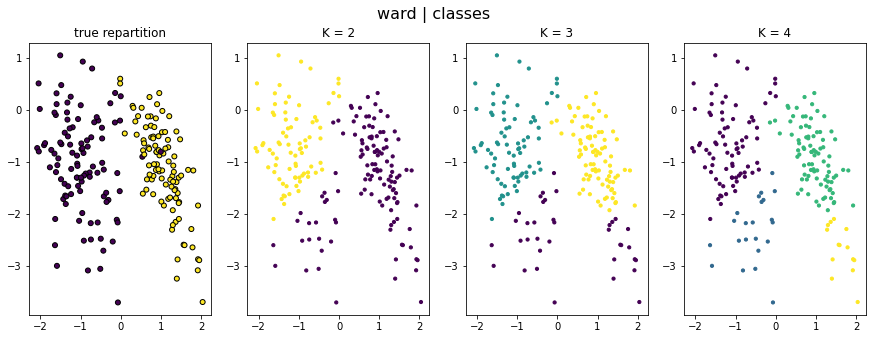

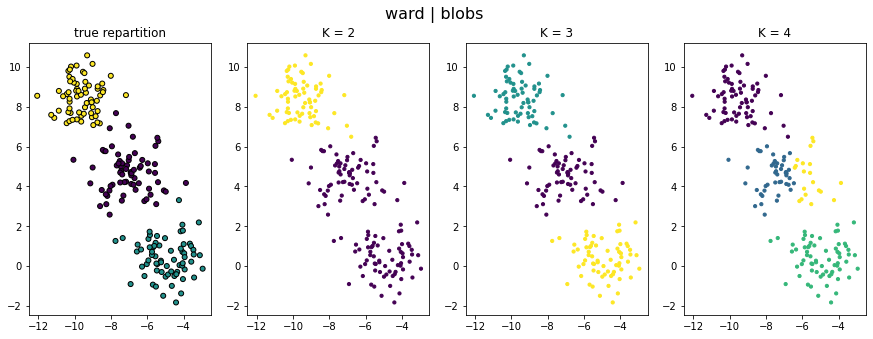

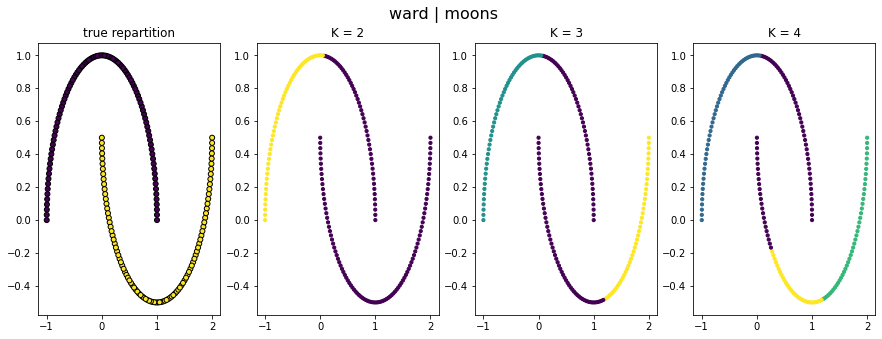

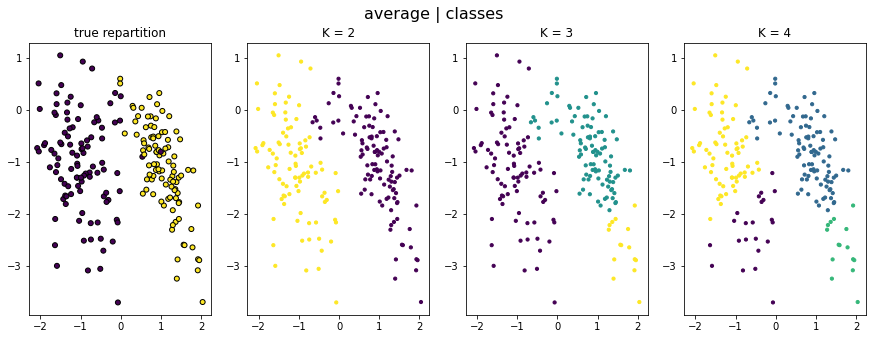

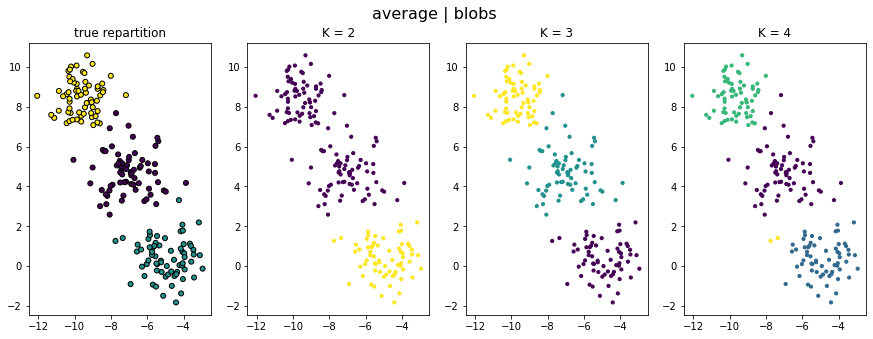

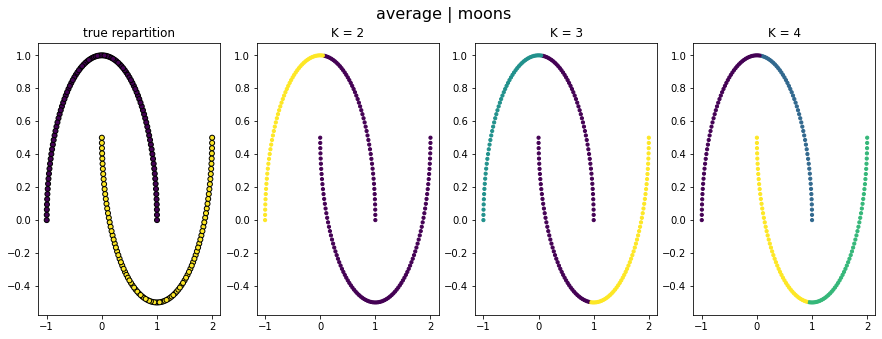

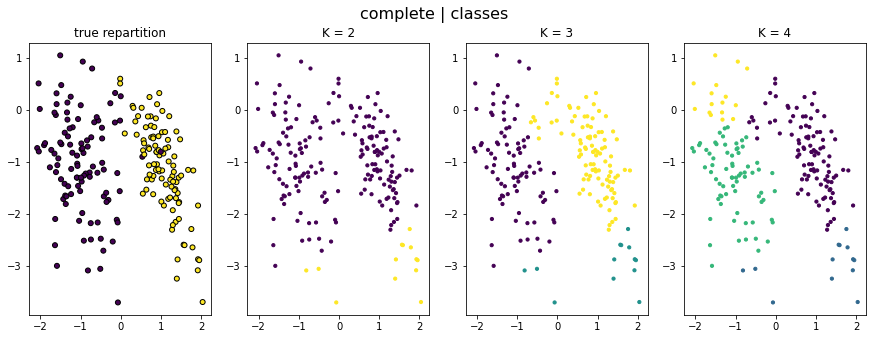

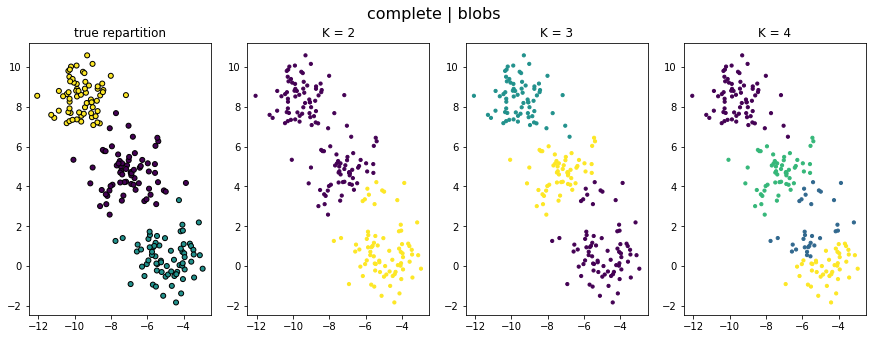

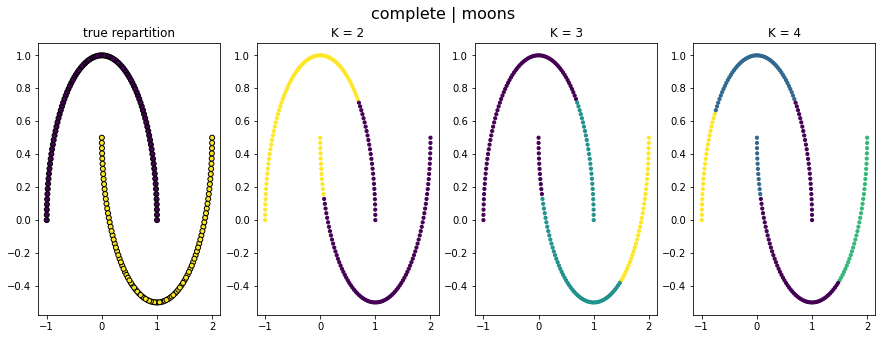

In [16]:
hierarchical_clustering_scores = {}
linkages = ['ward', 'average', 'complete']
for linkage in linkages :
    hierarchical_clustering_scores[linkage] = {}
    clustering = AgglomerativeClustering(linkage=linkage)
    for configuration in data:
        hierarchical_clustering_scores[linkage][configuration] = {}
        X, Y = data[configuration]

        plt.figure(figsize=(15, 5))
        plt.suptitle(linkage+" | "+str(configuration), fontsize=16)

        # plot the true repartition
        ax = plt.subplot(1, 4, 1)
        ax.set_title("true repartition")
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,s=25, edgecolor='k')
        for it, k in enumerate([2, 3, 4]):
            clustering.set_params(**{"n_clusters" : k})
            clustering.fit(X)
            ax = plt.subplot(1, 4, it+2)
            ax.set_title("K = "+str(k))
            plt.scatter(X[:, 0], X[:, 1], s=10, c=clustering.labels_)
            
            # scoring
            hierarchical_clustering_scores[linkage][configuration][k] = {}
            for metric_name in metrics_list:
                if metric_name == 'Silhouette Coefficient' :
                    hierarchical_clustering_scores[linkage][configuration][k][metric_name] \
                    = metrics_list[metric_name](X, clustering.labels_)
                else :
                    hierarchical_clustering_scores[linkage][configuration][k][metric_name] \
                    = metrics_list[metric_name](Y, clustering.labels_)

> We display the results of hierarchical clustering (with different linkage) on the three toy datasets for different values of k.
* For the classes dataset, ward linkage and complete linkage perform similarily to k-means. Average linkage performs poorly, even when k is set to the real number of classes. It is not robust to outliers (two points mess up the result.) this is because it computes the average of the distances between all observations of each two clusters as a similarity measure to merge two clusters, so outliers are consequently clustered together.
* For the blobs dataset, average linkage performs good when $k$ is set to the real number of classes. However, the other two linkage perform poorely, this is due to the assumptions made in the algorithm which do not correpond to the data.
* For the moons dataset, all similarity measures fail.

# 3 - Spectral clustering

> Cost minimization clustering method. It is based on similarity graphs, it identifies communities of nodes in this graph based on the edges connecting them. An example of similarity graphs is the k-nearest neghibours graph, where two data points $X_1$ and $X_2$ are connected if and noly if $X_1$ is among the k nearest neighbours of $X_2$ and inversly. The weight carried by the corresponding edge is then $1$ if they are connected and $0$ if not. 
The goal is to minimize an empirical distortion : sum of weights of edges connecting vertices belonging to two differents clusters, normalized either by the size of the cluster (ratio cut) or it's volume (normalized cut). We normalize to avoid graph cuts that separate an individual vertex from the rest of the graph.

/home/merrouche/.local/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/merrouche/.local/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/merrouche/.local/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


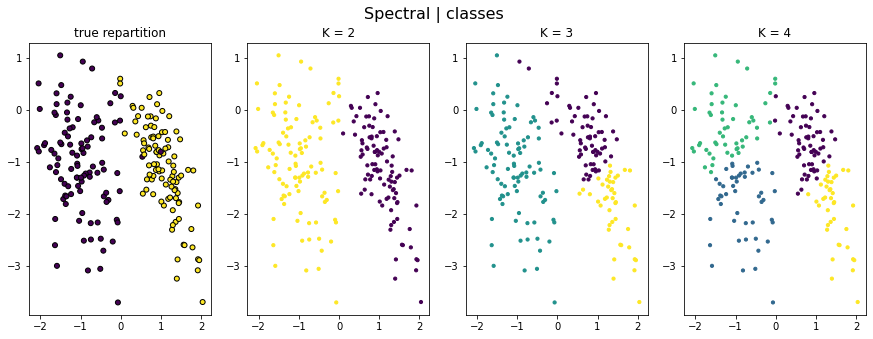

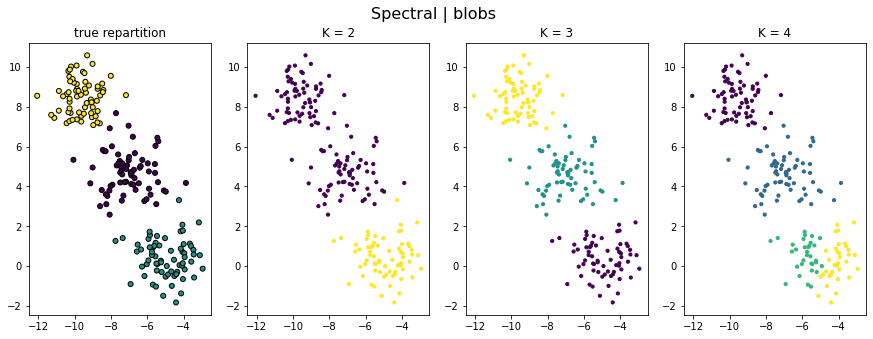

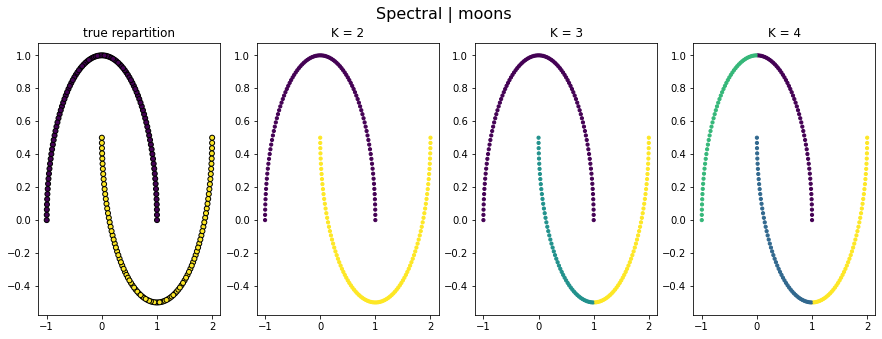

In [17]:
spectral_clustering_scores = {}
spectral = cluster.SpectralClustering(eigen_solver='arpack', affinity="nearest_neighbors")
for configuration in data:
    spectral_clustering_scores[configuration] = {}
    X, Y = data[configuration]

    plt.figure(figsize=(15, 5))
    plt.suptitle("Spectral | "+str(configuration), fontsize=16)
    
    # plot the true repartition
    ax = plt.subplot(1, 4, 1)
    ax.set_title("true repartition")
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,s=25, edgecolor='k')
    for it, k in enumerate([2, 3, 4]):
        spectral.set_params(**{"n_clusters" : k})
        spectral.fit(X)
        ax = plt.subplot(1, 4, it+2)
        ax.set_title("K = "+str(k))
        plt.scatter(X[:, 0], X[:, 1], s=10, c=spectral.labels_)
        
        # scoring
        spectral_clustering_scores[configuration][k] = {}
        for metric_name in metrics_list:
            if metric_name == 'Silhouette Coefficient' :
                spectral_clustering_scores[configuration][k][metric_name] = metrics_list[metric_name]\
                (X, spectral.labels_)
            else :
                spectral_clustering_scores[configuration][k][metric_name] = metrics_list[metric_name]\
                (Y, spectral.labels_)

# warning means that there exist points in the similarity graph that is not connected to any other point.

> We display the results of spectral clustering on the three toy datasets for different values of k.
* For the classes dataset, it gives a similar result as the ground truth data when k is set to the real number of classes.
* For the blobs dataset, it gives satisfactory results.
* For the moons dataset, it achieves perfect clustering when k is set to the real number of classes.

# 4 - Analysis of the clustering results
> In this part we will analyse the clustering results of each algorithm based on different metrics described below :

**Description of each metric :**
> * **Homogeneity :** a clustering is homogenous if all its clusters contain only data points which are members of a single class. Meaning that we check that each cluster doesn't contain points from different classes (best 1, worst 0).
* **Completeness :** a clustering is complete if all data points which belong to the same class are members of the same cluster. Meaning that we check if each class is clustered in the same cluster (best 1, worst 0).
* **V-measure :** V-measure is the harmonic mean between homogeneity and completeness (best 1, worst 0).
* **Adjusted Rand-Index :** RI score computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. Meaning that for each pair of data points we check if the two points are of the same/different class, and then we check if the are in the same/different cluster. The adjusted Rand index is the corrected-for-chance version of the Rand index (best 1, worst 0).
* **Silhouette Coefficient :** Silhouette Coefficient for a sample is $\frac{(b - a)}{\max{(a, b)}}$. where :
    * b is the distance of the sample to the cluster center.
    * a is the distance of the sample to  the nearest cluster that the sample is not a part of. <br>
the mean silhouette coefficient is returned (best 1, worst -1).

In [18]:
import pandas as pd
# just to display the different scores for the different clustering methods

# kmeans
classes_df_kmeans = pd.DataFrame.from_dict(k_means_scores["classes"])
blobs_df_kmeans = pd.DataFrame.from_dict(k_means_scores["blobs"])
moons_df_kmeans = pd.DataFrame.from_dict(k_means_scores["moons"])
k_means_df = pd.concat([classes_df_kmeans, blobs_df_kmeans, moons_df_kmeans], keys=["classes", "blobs", "moons"])

# spectral clustering
classes_df_spetral_clustering = pd.DataFrame.from_dict(spectral_clustering_scores["classes"])
blobs_df_spectral_clustering = pd.DataFrame.from_dict(spectral_clustering_scores["blobs"])
moons_df_spectral_clustering = pd.DataFrame.from_dict(spectral_clustering_scores["moons"])
spectral_clustering_df = pd.concat([classes_df_spetral_clustering, blobs_df_spectral_clustering,\
                        moons_df_spectral_clustering], keys=["classes", "blobs", "moons"])

# hierarchical clustering
dfs_final = []
for linkage in ["ward", "average", "complete"]:
    dfs = []
    for configuration in ["classes","blobs","moons"]:
        dfs.append(pd.DataFrame.from_dict(hierarchical_clustering_scores[linkage][configuration]))
    dfs_final.append(pd.concat(dfs, keys=["classes", "blobs", "moons"]))
hierarchical_df = pd.concat(dfs_final, keys=["ward", "average", "complete"])

## K-means :

In [19]:
display(k_means_df)

2         3         4
classes Homogeneity             0.745142  0.867831  0.831040
        Completeness            0.745411  0.575152  0.424452
        V-measure               0.745276  0.691809  0.561910
        Adjusted Rand-Index     0.827233  0.679607  0.441878
        Silhouette Coefficient  0.475122  0.438113  0.407160
blobs   Homogeneity             0.429294  0.920524  0.896939
        Completeness            0.686402  0.920650  0.742751
        V-measure               0.528223  0.920587  0.812595
        Adjusted Rand-Index     0.450780  0.941367  0.794573
        Silhouette Coefficient  0.547453  0.606905  0.517811
moons   Homogeneity             0.188722  0.428099  0.592063
        Completeness            0.188722  0.275029  0.299176
        V-measure               0.188722  0.334903  0.397494
        Adjusted Rand-Index     0.246212  0.266782  0.300277
        Silhouette Coefficient  0.489412  0.423643  0.461649

> The results of the different metrics are in line with what we observed earlier. Where K-means performs well (classes dataset and blobs dataset for the real value of k) the metrics have the largest values. For the classes dataset, due to the presence of an overlapping area in the data, the clustering is imperfect, as confirmed by the homogeneity, Completeness and V-measure ($\approx 0.7$). For the moons dataset, it performs very poorly across all metrics.

## Spectral Clustering :

In [21]:
display(spectral_clustering_df)

2         3         4
classes Homogeneity             0.858525  0.811382  0.832300
        Completeness            0.858525  0.535945  0.419846
        V-measure               0.858525  0.645509  0.558142
        Adjusted Rand-Index     0.921204  0.628373  0.442443
        Silhouette Coefficient  0.478134  0.411054  0.410275
blobs   Homogeneity             0.580439  0.911831  0.911831
        Completeness            1.000000  0.911831  0.754781
        V-measure               0.734529  0.911831  0.825907
        Adjusted Rand-Index     0.570815  0.940680  0.809012
        Silhouette Coefficient  0.565525  0.607871  0.516375
moons   Homogeneity             1.000000  1.000000  1.000000
        Completeness            1.000000  0.666667  0.500000
        V-measure               1.000000  0.800000  0.666667
        Adjusted Rand-Index     1.000000  0.748420  0.496203
        Silhouette Coefficient  0.328316  0.344517  0.488384

> Results are in line with what we observed earlier. We get good results on the datasets for the real values of k. For the moons dataset it is particularly performant, it achieves perfect homogeneity, completeness, V-mesure and Adjusted Rand-Index. However, the silhouette coefficient is low. This last metric is based on distance to cluster center, the euclidean distance has no notion of the geometry of the different clusters. The moons dataset is not spherical, the euclidean distance is limited in describing the distance of a point to its cluster.

## Hierarchical Clustering :

In [22]:
display(hierarchical_df)

2         3         4
ward     classes Homogeneity             0.476844  0.642571  0.816155
                 Completeness            0.494099  0.428637  0.487931
                 V-measure               0.485318  0.514241  0.610738
                 Adjusted Rand-Index     0.516077  0.578172  0.609109
                 Silhouette Coefficient  0.431051  0.450793  0.436912
         blobs   Homogeneity             0.493932  0.883529  0.890592
                 Completeness            0.842202  0.883769  0.753252
                 V-measure               0.622678  0.883649  0.816185
                 Adjusted Rand-Index     0.519676  0.912511  0.818484
                 Silhouette Coefficient  0.559745  0.600653  0.520064
         moons   Homogeneity             0.327324  0.482222  0.669413
                 Completeness            0.395918  0.326612  0.345149
                 V-measure               0.358368  0.389448  0.455462
                 Adjusted Rand-Index     0.267567  0.230454  0.306923
                 Silhouette Coefficient  0.431977  0.415658  0.432991
average  classes Homogeneity             0.726479  0.739983  0.739983
                 Completeness            0.731555  0.565217  0.443007
                 V-measure               0.729008  0.640899  0.554218
                 Adjusted Rand-Index     0.773272  0.666018  0.515233
                 Silhouette Coefficient  0.455782  0.415724  0.415130
         blobs   Homogeneity             0.553613  0.934944  0.934944
                 Completeness            0.959024  0.935516  0.898830
                 V-measure               0.701991  0.935230  0.916531
                 Adjusted Rand-Index     0.552491  0.954901  0.940064
                 Silhouette Coefficient  0.562681  0.599097  0.471223
         moons   Homogeneity             0.327324  0.520000  1.000000
                 Completeness            0.395918  0.342365  0.500289
                 V-measure               0.358368  0.412888  0.666923
                 Adjusted Rand-Index     0.267567  0.265718  0.497011
                 Silhouette Coefficient  0.431977  0.425801  0.487820
complete classes Homogeneity             0.016394  0.684571  0.684571
                 Completeness            0.047233  0.535202  0.433631
                 V-measure               0.024339  0.600741  0.530944
                 Adjusted Rand-Index     0.006586  0.667456  0.552986
                 Silhouette Coefficient  0.353882  0.432279  0.382218
         blobs   Homogeneity             0.484163  0.781913  0.821210
                 Completeness            0.800970  0.788178  0.669021
                 V-measure               0.603518  0.785033  0.737344
                 Adjusted Rand-Index     0.511000  0.805398  0.720568
                 Silhouette Coefficient  0.569063  0.562450  0.473853
         moons   Homogeneity             0.307761  0.385407  0.414829
                 Completeness            0.312190  0.259198  0.224576
                 V-measure               0.309960  0.309947  0.291398
                 Adjusted Rand-Index     0.381352  0.284698  0.193839
                 Silhouette Coefficient  0.476475  0.429638  0.412814

> * Ward linkage : the metrics confirm the previous results. It performs badly on the moons dataset and even on the classes dataset.
* Average linkage : Similar performance to k-means (good results on the classes and on the blobs dataset but poor performances on the moons dataset.
* Complete linkege : Performs poorly on the three datasets compared to the other algorithms.

**Remarks on the behaviour of the different metrics :**
* For values of k which are larger than the real number of classes, we may get a larger homogeneity score. This is because the probability that a cluster contains two points from different classes decreases because we have more clusters (if we have as many clusters as data points we ensure a perfect homogeneity).
* Completeness may be misleading, a clustering that assigns the majority of every class to the same cluster has a large score (one cluster achieves perfect completeness)
* V-measure is a good balance between homogeneity and completeness.
* Adjusted rand index is a coherent measure for describing a good clustering, only perfect clustering achieves a perfect score (=1).
* The silhouette coefficient is obsolete for non spherical clusters since it is based on the euclidean distance.

**Comparison :**
Based on the former experiments, it is clear that spectral clustering is the most performant algorithm for the toy datasets that we considered. Moreover, it is the only algorithm which was able to cluster correctly the moons dataset when given the true number of classes. Anther aspect to take into consideration, is that unlike k-means, this method is independent of the initialisation (no centoirds to initialise).

# 5 - Application on medical data
> In this section we apply the former algorithms on the two medicat datasets described above.

In [23]:
# K-means
k_means_scores_medical = {}
ks = {"breast" : [2, 3, 4, 5, 6], "mice": [6, 8, 10, 12, 14, 16]}
km = KMeans(init='k-means++', max_iter=100, n_init=1)
for configuration in medical_data:
    k_means_scores_medical[configuration] = {}
    X, Y = medical_data[configuration]
    for it, k in enumerate(ks[configuration]):
        km.set_params(**{"n_clusters" : k})
        km.fit(X)
        # scoring
        k_means_scores_medical[configuration][k] = {}
        for metric_name in metrics_list:
            if metric_name == 'Silhouette Coefficient' :
                k_means_scores_medical[configuration][k][metric_name] = metrics_list[metric_name](X, km.labels_)
            else :
                k_means_scores_medical[configuration][k][metric_name] = metrics_list[metric_name](Y, km.labels_)

# data frame of scores
breast_df_kmeans_medical = pd.DataFrame.from_dict(k_means_scores_medical["breast"])
mice_df_kmeans = pd.DataFrame.from_dict(k_means_scores_medical["mice"])
k_means_df_medcial = pd.concat([breast_df_kmeans_medical, mice_df_kmeans], \
                               keys=["breast", "mice"])
display(k_means_df_medcial)

2         3         4         5   \
breast Homogeneity             0.422291  0.447857  0.575050  0.600458   
       Completeness            0.516809  0.451041  0.333277  0.304269   
       V-measure               0.464793  0.449444  0.421986  0.403880   
       Adjusted Rand-Index     0.491425  0.501563  0.412743  0.364954   
       Silhouette Coefficient  0.697265  0.675258  0.533461  0.512269   
mice   Homogeneity                  NaN       NaN       NaN       NaN   
       Completeness                 NaN       NaN       NaN       NaN   
       V-measure                    NaN       NaN       NaN       NaN   
       Adjusted Rand-Index          NaN       NaN       NaN       NaN   
       Silhouette Coefficient       NaN       NaN       NaN       NaN   

                                     6         8         10        12  \
breast Homogeneity             0.589279       NaN       NaN       NaN   
       Completeness            0.271871       NaN       NaN       NaN   
       V-measure               0.372079       NaN       NaN       NaN   
       Adjusted Rand-Index     0.308098       NaN       NaN       NaN   
       Silhouette Coefficient  0.495627       NaN       NaN       NaN   
mice   Homogeneity             0.272760  0.295551  0.405460  0.446008   
       Completeness            0.320807  0.297438  0.368404  0.386366   
       V-measure               0.294839  0.296492  0.386045  0.414050   
       Adjusted Rand-Index     0.178587  0.168508  0.219390  0.248471   
       Silhouette Coefficient  0.180728  0.170050  0.171868  0.198000   

                                     14        16  
breast Homogeneity                  NaN       NaN  
       Completeness                 NaN       NaN  
       V-measure                    NaN       NaN  
       Adjusted Rand-Index          NaN       NaN  
       Silhouette Coefficient       NaN       NaN  
mice   Homogeneity             0.494184  0.545195  
       Completeness            0.398116  0.419103  
       V-measure               0.440979  0.473905  
       Adjusted Rand-Index     0.237538  0.245923  
       Silhouette Coefficient  0.189327  0.180963

In [24]:
# Spectral Clustering
spectral_clustering_scores_medical = {}
ks = {"breast" : [2, 3, 4, 5, 6], "mice": [6, 8, 10, 12, 14, 16]}
spectral = cluster.SpectralClustering(eigen_solver='arpack', affinity="nearest_neighbors")
for configuration in medical_data:
    spectral_clustering_scores_medical[configuration] = {}
    X, Y = medical_data[configuration]

    for it, k in enumerate(ks[configuration]):
        spectral.set_params(**{"n_clusters" : k})
        spectral.fit(X)
        
        # scoring
        spectral_clustering_scores_medical[configuration][k] = {}
        for metric_name in metrics_list:
            if metric_name == 'Silhouette Coefficient' :
                spectral_clustering_scores_medical[configuration][k][metric_name] = metrics_list[metric_name]\
                (X, spectral.labels_)
            else :
                spectral_clustering_scores_medical[configuration][k][metric_name] = metrics_list[metric_name]\
                (Y, spectral.labels_)
    
# data frame of scores
breast_df_spetral_clustering = pd.DataFrame.from_dict(spectral_clustering_scores_medical["breast"])
mice_df_spectral_clustering = pd.DataFrame.from_dict(spectral_clustering_scores_medical["mice"])
spectral_clustering_df_medical = pd.concat([breast_df_spetral_clustering, mice_df_spectral_clustering]\
                                            , keys=["breast", "mice"])
display(spectral_clustering_df_medical)

2         3         4         5   \
breast Homogeneity             0.427039  0.505714  0.567487  0.601845   
       Completeness            0.407686  0.321827  0.282121  0.256142   
       V-measure               0.417138  0.393340  0.376880  0.359348   
       Adjusted Rand-Index     0.419496  0.281601  0.261901  0.240361   
       Silhouette Coefficient  0.406467  0.445061  0.448942  0.443705   
mice   Homogeneity                  NaN       NaN       NaN       NaN   
       Completeness                 NaN       NaN       NaN       NaN   
       V-measure                    NaN       NaN       NaN       NaN   
       Adjusted Rand-Index          NaN       NaN       NaN       NaN   
       Silhouette Coefficient       NaN       NaN       NaN       NaN   

                                     6         8         10        12  \
breast Homogeneity             0.625699       NaN       NaN       NaN   
       Completeness            0.237551       NaN       NaN       NaN   
       V-measure               0.344363       NaN       NaN       NaN   
       Adjusted Rand-Index     0.175323       NaN       NaN       NaN   
       Silhouette Coefficient  0.413275       NaN       NaN       NaN   
mice   Homogeneity             0.588666  0.689729  0.744827  0.832851   
       Completeness            0.742098  0.760374  0.740402  0.733747   
       V-measure               0.656537  0.723331  0.742608  0.780164   
       Adjusted Rand-Index     0.476806  0.571614  0.575453  0.673956   
       Silhouette Coefficient  0.128710  0.136008  0.133297  0.151515   

                                     14        16  
breast Homogeneity                  NaN       NaN  
       Completeness                 NaN       NaN  
       V-measure                    NaN       NaN  
       Adjusted Rand-Index          NaN       NaN  
       Silhouette Coefficient       NaN       NaN  
mice   Homogeneity             0.872144  0.890690  
       Completeness            0.727737  0.711148  
       V-measure               0.793423  0.790857  
       Adjusted Rand-Index     0.686632  0.655221  
       Silhouette Coefficient  0.146657  0.146465

In [25]:
# Hierarchical Clustering
hierarchical_clustering_scores_medical = {}
ks = {"breast" : [2, 3, 4, 5, 6], "mice": [6, 8, 10, 12, 14, 16]}
linkages = ['ward', 'average', 'complete']
for linkage in linkages :
    hierarchical_clustering_scores_medical[linkage] = {}
    clustering = AgglomerativeClustering(linkage=linkage)
    for configuration in medical_data:
        hierarchical_clustering_scores_medical[linkage][configuration] = {}
        X, Y = medical_data[configuration]

        for it, k in enumerate(ks[configuration]):
            clustering.set_params(**{"n_clusters" : k})
            clustering.fit(X)
            
            # scoring
            hierarchical_clustering_scores_medical[linkage][configuration][k] = {}
            for metric_name in metrics_list:
                if metric_name == 'Silhouette Coefficient' :
                    hierarchical_clustering_scores_medical[linkage][configuration][k][metric_name] \
                    = metrics_list[metric_name](X, clustering.labels_)
                else :
                    hierarchical_clustering_scores_medical[linkage][configuration][k][metric_name] \
                    = metrics_list[metric_name](Y, clustering.labels_)
    
# data frame of scores
dfs_final = []
for linkage in ["ward", "average", "complete"]:
    dfs = []
    for configuration in ["breast","mice"]:
        dfs.append(pd.DataFrame.from_dict(hierarchical_clustering_scores_medical[linkage][configuration]))
    dfs_final.append(pd.concat(dfs, keys=["breast", "mice"]))
hierarchical_df_medical = pd.concat(dfs_final, keys=["ward", "average", "complete"])
display(hierarchical_df_medical)

2         3         4   \
ward     breast Homogeneity             0.262150  0.526578  0.526578   
                Completeness            0.407601  0.344712  0.326031   
                V-measure               0.319082  0.416664  0.402719   
                Adjusted Rand-Index     0.287246  0.390288  0.380617   
                Silhouette Coefficient  0.689980  0.508254  0.509003   
         mice   Homogeneity                  NaN       NaN       NaN   
                Completeness                 NaN       NaN       NaN   
                V-measure                    NaN       NaN       NaN   
                Adjusted Rand-Index          NaN       NaN       NaN   
                Silhouette Coefficient       NaN       NaN       NaN   
average  breast Homogeneity             0.054202  0.054202  0.467934   
                Completeness            0.235139  0.224832  0.445611   
                V-measure               0.088097  0.087347  0.456500   
                Adjusted Rand-Index     0.052305  0.052071  0.537080   
                Silhouette Coefficient  0.690935  0.672580  0.657421   
         mice   Homogeneity                  NaN       NaN       NaN   
                Completeness                 NaN       NaN       NaN   
                V-measure                    NaN       NaN       NaN   
                Adjusted Rand-Index          NaN       NaN       NaN   
                Silhouette Coefficient       NaN       NaN       NaN   
complete breast Homogeneity             0.054202  0.054202  0.422733   
                Completeness            0.235139  0.224832  0.432832   
                V-measure               0.088097  0.087347  0.427723   
                Adjusted Rand-Index     0.052305  0.052071  0.464656   
                Silhouette Coefficient  0.690935  0.672580  0.670675   
         mice   Homogeneity                  NaN       NaN       NaN   
                Completeness                 NaN       NaN       NaN   
                V-measure                    NaN       NaN       NaN   
                Adjusted Rand-Index          NaN       NaN       NaN   
                Silhouette Coefficient       NaN       NaN       NaN   

                                              5         6         8   \
ward     breast Homogeneity             0.623660  0.623660       NaN   
                Completeness            0.320204  0.299709       NaN   
                V-measure               0.423151  0.404858       NaN   
                Adjusted Rand-Index     0.406254  0.390726       NaN   
                Silhouette Coefficient  0.511445  0.505179       NaN   
         mice   Homogeneity                  NaN  0.381212  0.473035   
                Completeness                 NaN  0.454667  0.502010   
                V-measure                    NaN  0.414712  0.487092   
                Adjusted Rand-Index          NaN  0.246898  0.307803   
                Silhouette Coefficient       NaN  0.145774  0.167595   
average  breast Homogeneity             0.467934  0.467934       NaN   
                Completeness            0.441230  0.427833       NaN   
                V-measure               0.454190  0.446986       NaN   
                Adjusted Rand-Index     0.536861  0.535877       NaN   
                Silhouette Coefficient  0.652574  0.627922       NaN   
         mice   Homogeneity                  NaN  0.101437  0.103222   
                Completeness                 NaN  0.246201  0.246859   
                V-measure                    NaN  0.143677  0.145574   
                Adjusted Rand-Index          NaN  0.023273  0.023340   
                Silhouette Coefficient       NaN  0.159639  0.096854   
complete breast Homogeneity             0.422733  0.422733       NaN   
                Completeness            0.417865  0.414322       NaN   
                V-measure               0.420285  0.418485       NaN   
                Adjusted Rand-Index     0.463562  0.463453       NaN   
             

> What we can say is that no algorithm, even when given the true number of classes, yields satisfactory results. Let's note that for the breast dataset, k-means yields the best performances. For the mice dataset, Spectral clustering yields the best performances.
* Another important thing is the troubling behaviour of the different assessed metrics, they are completely incoherent with the true number of classes. If we exclude the quality of the dataset (correlation between the variables and the labels), this sheds light on two problems. The intrinsic limitations of these metrics on one side and the difficulty of choosing the right value of $k$ on the other, since these metrics seem to be not suitable for this task.